<div class="alert alert-block alert-danger">

# **Performance of the Eversense versus the Free Style Libre Flash glucose monitor during exercise and normal daily activities in subjects with type 1 diabetes mellitus**
    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import scipy.stats as stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, roc_curve, f1_score
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn import svm
from scipy.optimize import curve_fit
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
import seaborn as sn
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import tree
# import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency, mood
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif, f_regression, mutual_info_regression, f_classif

from random import choices

In [2]:
dfw1 = pd.read_excel("Week 1.xlsx")
dfw2 = pd.read_excel("Week 2.xlsx")

dfw1['Datum'] = dfw1['Datum'].astype(str)
dfw2['Datum'] = dfw2['Datum'].astype(str)

dfw1.rename(columns={"Fingerprick  (mg/dL)": "Fingerprick (mg/dL)"}, inplace = True)

feature = "Patiënt ID"
elset = list(set(dfw1[feature].tolist()))

dfw1_dict = {idd: dfw1.loc[dfw1['Patiënt ID'] == idd] for idd in elset}
dfw2_dict = {idd: dfw2.loc[dfw2['Patiënt ID'] == idd] for idd in elset}

In [3]:
dfw1["Period"] = ['PA']*dfw1.shape[0]
dfw2["Period"] = ['NDA']*dfw2.shape[0]

dff = pd.concat([dfw1, dfw2], axis=0)

In [4]:
font = {'weight' : 'bold',
  'size' : 18}
plt.rc('font', **font)

<div class="alert alert-block alert-danger">

# **SAMPLES PER PATIENT**

</div>

In [ ]:
def muestras(patients):
  
  for e in patients:
    
    datesw1 = [str(j)[0:10] for j in list(dfw1_dict[e].Datum)]
    datesw2 = [str(j)[0:10] for j in list(dfw2_dict[e].Datum)]
    setdatesw1 = list(set(datesw1))
    setdatesw2 = list(set(datesw2))
    
    a = []
    b = []
    for i in datesw1:
        a.append(datesw1.count(i))
    for i in datesw2:
        b.append(datesw2.count(i))
    
    plt.figure(figsize=[20,4])
    plt.rc('font', size=20)
    plt.subplot(1, 2, 1)
    plt.bar(datesw1, a)
    plt.xticks(rotation = 45)
    plt.ylim(0,12)
    plt.title("Number of samples per Exercise day - Patient " + str(e))
    plt.subplot(1, 2, 2)
    plt.bar(datesw2, b)
    plt.xticks(rotation = 45)
    plt.ylim(0,12)
    plt.title("Number of samples per NDA day - Patient " + str(e))
    plt.show()

In [ ]:
muestras(list(elset))

<div class="alert alert-block alert-danger">
    
# **GLUCOSE SERIES**

</div>


In [ ]:
dfw1['Datum'] = dfw1['Datum'].str[0:10]
dfw2['Datum'] = dfw2['Datum'].str[0:10]

dfw1_dict = {idd: dfw1.loc[dfw1['Patiënt ID'] == idd] for idd in elset}
dfw2_dict = {idd: dfw2.loc[dfw2['Patiënt ID'] == idd] for idd in elset}

In [ ]:
def actnda(elsettt):
    
    for e in elsettt:
        nrow=1
        ncol=2
        p = 0
        q = 1
        fig, axes = plt.subplots(nrow, ncol)

        plt.rc('font', size=20)
        
        dfw1_dict[e][['FSL (mg/dL)', 'Fingerprick (mg/dL)', 'Eversense (mg/dl)', 'Datum']].plot(x = 'Datum', y = ['FSL (mg/dL)', 'Fingerprick (mg/dL)', 'Eversense (mg/dl)'],kind= 'line', figsize=(20,4), ax=axes[p], ylim=(0,500), rot = 45, title = 'Patient ' + str(e) + ' - Exercise')

        dfw2_dict[e][['FSL (mg/dL)','Fingerprick (mg/dL)','Eversense (mg/dl)', 'Datum']].plot(x = 'Datum', y = ['FSL (mg/dL)', 'Fingerprick (mg/dL)', 'Eversense (mg/dl)'],kind= 'line', figsize=(20,4), ax=axes[q], ylim=(0,500), rot = 45 ,title = 'Patient ' + str(e) + ' - NDA')


In [ ]:
elsettt = [1,2,3,4,5]
actnda(elsettt)
elsettt = [6,8,9,10,11]
actnda(elsettt)
elsettt = [12,13,14,15,17]
actnda(elsettt)
elsettt = [18,19,20,21,22]
actnda(elsettt)
elsettt = [23,24,25]
actnda(elsettt)

<div class="alert alert-block alert-danger">
    
# **TRIALS**

</div>


In [5]:
datesw1 = set(dfw1.Datum)
listas_fp_w1 = []
listas_fsl_w1 = []
listas_es_w1 = []

for e in elset:
    listapaciente1_fp_w1 = []
    listapaciente1_es_w1 = []
    listapaciente1_fsl_w1 = []
    datesw1_p1 = list(dfw1[dfw1['Patiënt ID'] == e].Datum)

    for date in datesw1:
        if date in datesw1_p1:
            listapaciente1_fp_w1.append(float(dfw1['Fingerprick (mg/dL)'].loc[((dfw1['Patiënt ID']==e)&(dfw1['Datum']==date))]))
            listapaciente1_fsl_w1.append(float(dfw1['FSL (mg/dL)'].loc[((dfw1['Patiënt ID']==e)&(dfw1['Datum']==date))]))
            listapaciente1_es_w1.append(float(dfw1['Eversense (mg/dl)'].loc[((dfw1['Patiënt ID']==e)&(dfw1['Datum']==date))]))
        else:
            listapaciente1_fp_w1.append(np.nan)
            listapaciente1_fsl_w1.append(np.nan)
            listapaciente1_es_w1.append(np.nan)
  
    listas_fp_w1.append(listapaciente1_fp_w1)
    listas_fsl_w1.append(listapaciente1_fsl_w1)
    listas_es_w1.append(listapaciente1_es_w1)  

In [6]:
datesw2 = set(dfw2.Datum)
listas_fp_w2 = []
listas_fsl_w2 = []
listas_es_w2 = []
for e in elset:
    listapaciente1_fp_w2 = []
    listapaciente1_es_w2 = []
    listapaciente1_fsl_w2 = []
    datesw2_p1 = list(dfw2[dfw2['Patiënt ID'] == e].Datum)
    for date in datesw2:
        if date in datesw2_p1:
            listapaciente1_fp_w2.append((list(dfw2['Fingerprick (mg/dL)'].loc[((dfw2['Patiënt ID']==e)&(dfw2['Datum']==date))])[0]))
            listapaciente1_fsl_w2.append(list(dfw2['FSL (mg/dL)'].loc[((dfw2['Patiënt ID']==e)&(dfw2['Datum']==date))])[0])
            listapaciente1_es_w2.append(list(dfw2['Eversense (mg/dl)'].loc[((dfw2['Patiënt ID']==e)&(dfw2['Datum']==date))])[0])
        else:
            listapaciente1_fp_w2.append(np.nan)
            listapaciente1_fsl_w2.append(np.nan)
            listapaciente1_es_w2.append(np.nan)

    listas_fp_w2.append(listapaciente1_fp_w2)
    listas_fsl_w2.append(listapaciente1_fsl_w2)
    listas_es_w2.append(listapaciente1_es_w2)

In [7]:
datesw1_ticks = datesw1

In [8]:
datesw2_ticks = datesw2

In [9]:
#import datetime
from datetime import datetime

In [10]:
datesw1 = list(datesw1)
datesw1_corrected = []
for i,f in enumerate(datesw1):
    datesw1[i] = datesw1[i][:10]
datesw1.sort(key=lambda date: datetime.strptime(date, "%Y-%m-%d"))

datesw2 = list(datesw2)
for i,f in enumerate(datesw2):
    datesw2[i] = datesw2[i][:10]
datesw2.sort(key=lambda date: datetime.strptime(date, "%Y-%m-%d"))

In [11]:
daysw1 = []
for i, f in enumerate(datesw1):
    if datesw1[i] not in daysw1:
        daysw1.append(datesw1[i][:10])
    else:
        daysw1.append(None)

daysw2 = []
for i, f in enumerate(datesw2):
    if datesw2[i] not in daysw2:
        daysw2.append(datesw2[i][:10]) 
    else:
        daysw2.append(None)

In [13]:
len(datesw2_ticks)

776

In [12]:
len(daysw2)

776

In [14]:
daysw2[-4:] = [""]*4

In [ ]:
df_fp_w1 = pd.DataFrame(listas_fp_w1)
df_fp_w1 = df_fp_w1.T
df_fp_w1.columns = elset
df_fp_w1 = df_fp_w1.interpolate()
df_fp_w1['mean'] = df_fp_w1.mean(axis = 1)

plt.figure(figsize = (20,6))
#with sns.color_palette("Greys", n_colors=23):
plt.plot(list(datesw1_ticks),df_fp_w1, color = 'gray', alpha = 0.6)
plt.plot(list(datesw1_ticks), df_fp_w1['mean'], '-.', color = 'red',linewidth=5, label= 'Mean')
plt.axhline(y=70, color='blue', linestyle='--',linewidth=4, label= 'Hypoglycemia')
plt.axhline(y=180, color='green', linestyle='--',linewidth=4, label='Hyperglycemia')
#plt.legend(fontsize = 24)
plt.gca.legend_ =None
plt.ylim(0,600)
plt.yticks(fontsize = 28)
plt.ylabel('Glucose values (mg/dL)',fontsize = 28, weight = 'bold')
#plt.title('Fingerprick PA', weight = 'bold', fontsize="xx-large")
plt.xticks(ticks=list(datesw1_ticks), labels=daysw1, rotation = 20, fontsize = 28)
plt.tick_params(bottom = False)
plt.xlabel("PA period",fontsize = 28, weight = 'bold')
plt.savefig('2_a.png', bbox_inches='tight')

In [ ]:
len(datesw2_ticks)

In [ ]:
len(daysw2)

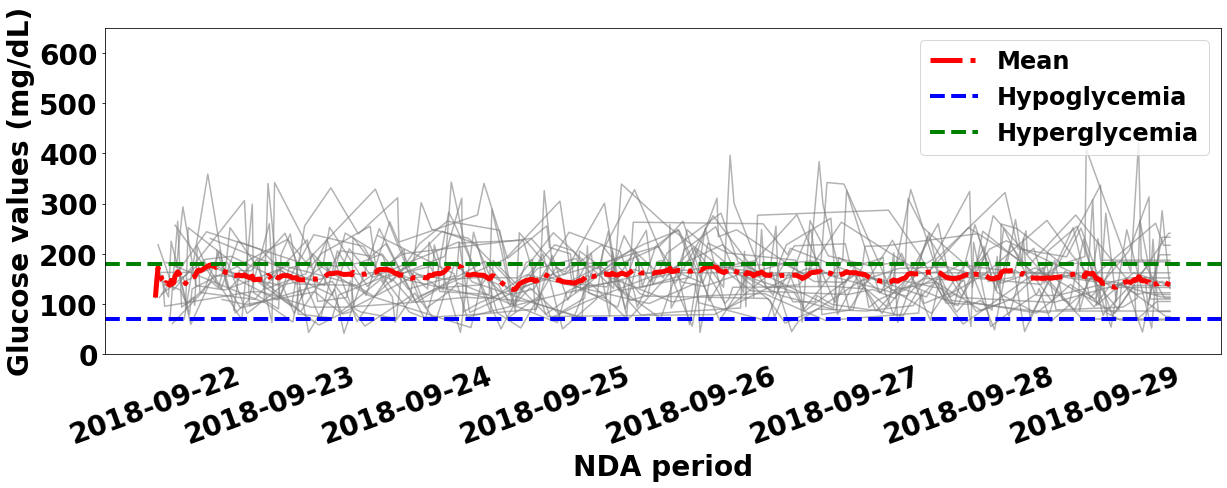

In [15]:
df_fp_w2 = pd.DataFrame(listas_fp_w2)
df_fp_w2 = df_fp_w2.T
df_fp_w2.columns = elset
df_fp_w2 = df_fp_w2.interpolate()
df_fp_w2['mean'] = df_fp_w2.mean(axis = 1)

plt.figure(figsize = (20,6))
#with sns.color_palette("Greys", n_colors=23):
plt.plot(list(datesw2_ticks),df_fp_w2, color = 'gray', alpha = 0.6)
plt.plot(list(datesw2_ticks), df_fp_w2['mean'], '-.', color = 'red',linewidth=5, label= 'Mean')
plt.axhline(y=70, color='blue', linestyle='--',linewidth=4, label= 'Hypoglycemia')
plt.axhline(y=180, color='green', linestyle='--',linewidth=4, label='Hyperglycemia')
plt.legend(fontsize = 24, loc = 'upper right')
plt.ylim(0,650)
plt.ylabel('Glucose values (mg/dL)',fontsize = 28, weight = 'bold')
#plt.title('Fingerprick NDA', weight = 'bold', fontsize="xx-large")
plt.xticks(ticks=list(datesw2_ticks), labels=daysw2, rotation = 20,fontsize = 28)
plt.yticks(fontsize = 28)
plt.tick_params(bottom = False)
plt.xlabel("NDA period",fontsize = 28, weight = 'bold')
plt.savefig('2_b.png', bbox_inches='tight')

In [ ]:
df_fsl_w1 = pd.DataFrame(listas_fsl_w1)
df_fsl_w1 = df_fsl_w1.T
df_fsl_w1.columns = elset
df_fsl_w1 = df_fsl_w1.interpolate()
df_fsl_w1['mean'] = df_fsl_w1.mean(axis = 1)


plt.figure(figsize = (20,6))
#with sns.color_palette("Greys", n_colors=23):
plt.plot(list(datesw1_ticks),df_fsl_w1, color = 'gray', alpha = 0.6)
plt.plot(list(datesw1_ticks), df_fsl_w1['mean'], '-.', color = 'red',linewidth=5, label= 'Mean')
plt.axhline(y=70, color='blue', linestyle='--',linewidth=4, label= 'Hypoglycemia')
plt.axhline(y=180, color='green', linestyle='--',linewidth=4, label='Hyperglycemia')
#plt.legend(fontsize = 24)
plt.yticks(fontsize = 28)
plt.ylabel('Glucose values (mg/dL)',fontsize = 28, weight = 'bold')
plt.ylim(0,650)
#plt.title('FSL PA', weight = 'bold', fontsize="xx-large")
plt.xticks(ticks=list(datesw1_ticks), labels=daysw1, rotation = 20,fontsize = 28)
plt.tick_params(bottom = False)
plt.xlabel("PA period",fontsize = 28, weight = 'bold')
plt.savefig('2_C.png', bbox_inches='tight')

In [ ]:
df_fsl_w2 = pd.DataFrame(listas_fsl_w2)
df_fsl_w2 = df_fsl_w2.T
df_fsl_w2.columns = elset
df_fsl_w2 = df_fsl_w2.interpolate()
df_fsl_w2['mean'] = df_fsl_w2.mean(axis = 1)

plt.figure(figsize = (20,6))
#with sns.color_palette("Greys", n_colors=23):
plt.plot(list(datesw2_ticks),df_fsl_w2, color = 'gray', alpha = 0.6)
plt.plot(list(datesw2_ticks), df_fsl_w2['mean'], '-.', color = 'red',linewidth=5, label= 'Mean')
plt.axhline(y=70, color='blue', linestyle='--',linewidth=4, label= 'Hypoglycemia')
plt.axhline(y=180, color='green', linestyle='--',linewidth=4, label='Hyperglycemia')
plt.legend(fontsize = 24, loc = 'upper right')
plt.ylim(0,650)
plt.yticks(fontsize = 28)
plt.ylabel('Glucose values (mg/dL)',fontsize = 28, weight = 'bold')
#plt.title('FSL NDA', weight = 'bold', fontsize="xx-large")
plt.xticks(ticks=list(datesw2_ticks), labels=daysw2, rotation = 20,fontsize = 28)
plt.tick_params(bottom = False)
plt.xlabel("NDA period",fontsize = 28, weight = 'bold')
plt.savefig('2_d.png', bbox_inches='tight')

In [ ]:
df_es_w1 = pd.DataFrame(listas_es_w1)
df_es_w1 = df_es_w1.T
df_es_w1.columns = elset
df_es_w1 = df_es_w1.interpolate()
df_es_w1['mean'] = df_es_w1.mean(axis = 1)

plt.figure(figsize = (20,6))
#with sns.color_palette("Greys", n_colors=23):
plt.plot(list(datesw1_ticks),df_es_w1, color = 'gray', alpha = 0.6)
plt.plot(list(datesw1_ticks), df_es_w1['mean'], '-.', color = 'red',linewidth=5, label= 'Mean')
plt.axhline(y=70, color='blue', linestyle='--',linewidth=4, label= 'Hypoglycemia')
plt.axhline(y=180, color='green', linestyle='--',linewidth=4, label='Hyperglycemia')
#plt.legend(fontsize = 24, loc = 'upper right')
plt.ylim(0,650)
plt.yticks(fontsize = 28)
plt.ylabel('Glucose values (mg/dL)',fontsize = 28, weight = 'bold')
#plt.title('FSL PA', weight = 'bold', fontsize="xx-large")
plt.xticks(ticks=list(datesw1_ticks), labels=daysw1, rotation = 20,fontsize = 28)
plt.xlabel("PA period",fontsize = 28, weight = 'bold')
plt.tick_params(bottom = False)
plt.savefig('2_e.png', bbox_inches='tight')

In [ ]:
df_es_w2 = pd.DataFrame(listas_es_w2)
df_es_w2 = df_es_w2.T
df_es_w2.columns = elset
df_es_w2 = df_es_w2.interpolate()
df_es_w2['mean'] = df_es_w2.mean(axis = 1)

plt.figure(figsize = (20,6))
#with sns.color_palette("Greys", n_colors=23):
plt.plot(list(datesw2_ticks),df_es_w2, color = 'gray', alpha = 0.6)
plt.plot(list(datesw2_ticks), df_es_w2['mean'], '-.', color = 'red',linewidth=5, label= 'Mean')
plt.axhline(y=70, color='blue', linestyle='--',linewidth=4, label= 'Hypoglycemia')
plt.axhline(y=180, color='green', linestyle='--',linewidth=4, label='Hyperglycemia')
plt.legend(fontsize = 24, loc='upper right')
plt.ylim(0,650)
#plt.yticks(fontsize = 28)
plt.ylabel('Glucose values (mg/dL)',fontsize = 28, weight = 'bold')
#plt.title('ES NDA', weight = 'bold', fontsize="xx-large")
plt.xticks(ticks=list(datesw2_ticks), labels=daysw2, rotation = 20,fontsize = 28)
plt.xlabel("NDA period",fontsize = 28, weight = 'bold')
plt.tick_params(bottom = False)
plt.savefig('2_f.png', bbox_inches='tight')

<div class="alert alert-block alert-danger">
    
# **MEAN AND STANDARD DEVIATION PER DAY AND PATIENT**

</div>

In [ ]:
def meanstdw1(alt, patients):

    meanw1 = []
    stdw1 = []
    uniquedatesw1 = []

    for e in patients:

        datesw1 = sorted(list(set([str(j)[0:10] for j in list(dfw1_dict[e].Datum)])))
        uniquedatesw1.append(datesw1)
        meanpatient = []
        stdpatient = []

        for date in datesw1:
            uno = dfw1.loc[(dfw1['Patiënt ID']==e) & (dfw1['Datum'].str.endswith(date))]
            meanpatient.append(np.mean(uno[alt]))
            stdpatient.append(np.std(uno[alt]))

        meanw1.append(meanpatient)
        stdw1.append(stdpatient)

    return meanw1, stdw1, uniquedatesw1

def meanstdw2(alt, patients):

    meanw2 = []
    stdw2 = []
    uniquedatesw2 = []

    for e in patients:

        datesw2 = sorted(list(set([str(j)[0:10] for j in list(dfw2_dict[e].Datum)])))
        uniquedatesw2.append(datesw2)
        meanpatient = []
        stdpatient = []

        for date in datesw2:
            uno = dfw2.loc[(dfw2['Patiënt ID']==e) & (dfw2['Datum'].str.endswith(date))]
            meanpatient.append(np.mean(uno[alt]))
            stdpatient.append(np.std(uno[alt]))

        meanw2.append(meanpatient)
        stdw2.append(stdpatient)

    return meanw2, stdw2, uniquedatesw2


In [ ]:
mesw1, sesw1, desw1 = meanstdw1('Eversense (mg/dl)', elset)
mesw2, sesw2, desw2 = meanstdw2('Eversense (mg/dl)', elset)

mfslw1, sfslw1, dfslw1 = meanstdw1('FSL (mg/dL)', elset)
mfslw2, sfslw2, dfslw2 = meanstdw2('FSL (mg/dL)', elset)

mfpw1, sfpw1, dfpw1 = meanstdw1('Fingerprick (mg/dL)', elset)
mfpw2, sfpw2, dfpw2 = meanstdw2('Fingerprick (mg/dL)', elset)

In [ ]:
cont = 0

for e in elset:

    plt.figure(figsize=[20,4])

    plt.rc('font', size=20)

    plt.subplot(1,2,1)
    plt.errorbar(x = desw1[cont], y = mesw1[cont], yerr = sesw1[cont], fmt = ".", label ='Eversense', alpha = 1, color = 'blue', solid_capstyle='projecting', capsize=10, markersize=14)
    plt.errorbar(dfpw1[cont], mfpw1[cont], sfpw1[cont], fmt = ".", label ='FingerPrick', alpha = 1, color = 'green', solid_capstyle='projecting', capsize=10, markersize=14)
    plt.errorbar(dfslw1[cont], mfslw1[cont], sfslw1[cont], fmt = ".", label ='FSL', alpha = 1, color = 'red', solid_capstyle='projecting', capsize=10, markersize=14)
    plt.axhline(y=70, linestyle = '--', color = 'black')
    plt.axhline(y=180, linestyle = '--', color = 'black')
    plt.xticks(rotation = 45)
    plt.title("Patient " + str(e) + " - Week 1")
    plt.ylim(0,550)
    plt.legend()
    plt.subplot(1,2,2)
    plt.errorbar(desw2[cont], mesw2[cont], sesw2[cont], fmt = ".", label ='Eversense', alpha = 1, color = 'blue', solid_capstyle='projecting', capsize=10, markersize=14)
    plt.errorbar(dfpw2[cont], mfpw2[cont], sfpw2[cont], fmt = ".", label ='FingerPrick', alpha = 1, color = 'green', solid_capstyle='projecting', capsize=10, markersize=14)
    plt.errorbar(dfslw2[cont], mfslw2[cont], sfslw2[cont], fmt = ".", label ='FSL', alpha = 1, color = 'red', solid_capstyle='projecting', capsize=10, markersize=14)
    plt.axhline(y=70, linestyle = '--', color = 'black')
    plt.axhline(y=180, linestyle = '--', color = 'black')
    plt.xticks(rotation = 45)
    plt.title("Patient " + str(e) + " - Week 2")
    plt.ylim(0,550)
    plt.legend()
    plt.show()

    cont += 1

<div class="alert alert-block alert-danger">
    
# **BOXPLOTS PER METHOD AND PATIENT**

</div>

In [ ]:
plt.figure(figsize = (30, 6))
plt.title((''))
sns.boxplot(data = dff , x = 'Patiënt ID' , y = 'Fingerprick (mg/dL)' , hue = 'Period', notch = True)
plt.xlabel('Patient ID',fontsize = 28,weight = 'bold')
plt.ylabel('Glucose values (mg/dL)',fontsize = 28,weight = 'bold')
plt.grid(linestyle='--', alpha = 0.7) 
plt.legend(borderpad=0.6)
plt.savefig('1_a.png', bbox_inches='tight')

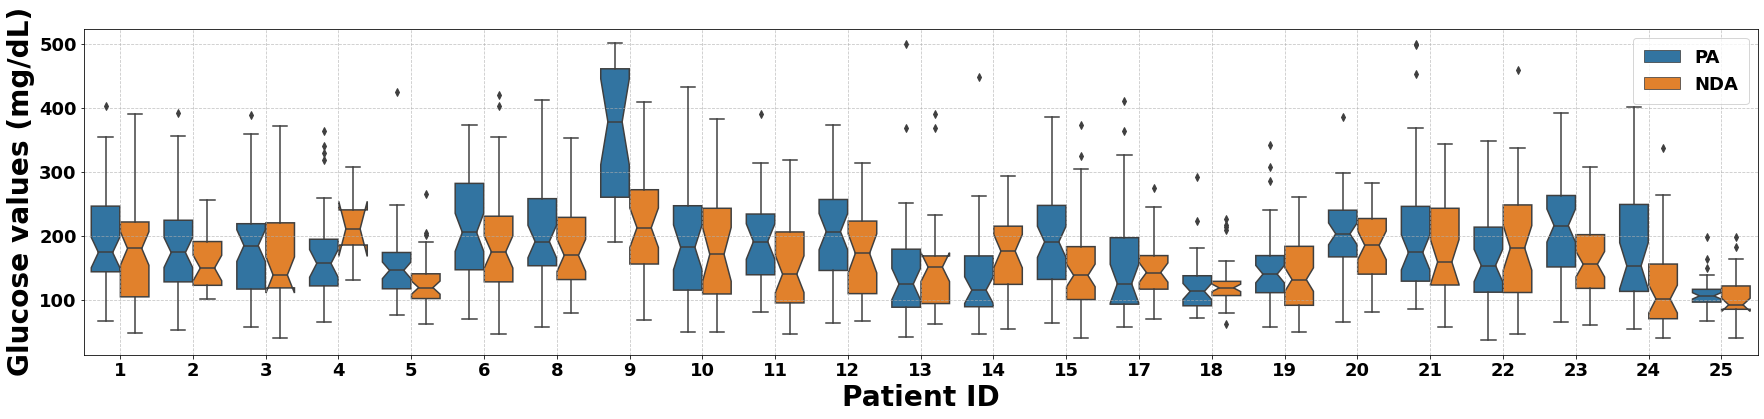

In [16]:
plt.figure(figsize = (30, 6))
plt.title((''))
sns.boxplot(data = dff , x = 'Patiënt ID' , y = 'FSL (mg/dL)' , hue = 'Period', notch = True)
plt.xlabel('Patient ID',fontsize = 28,weight = 'bold')
plt.ylabel('Glucose values (mg/dL)',fontsize = 28,weight = 'bold')
plt.grid(linestyle='--', alpha = 0.7)
plt.legend(borderpad=0.6, loc = 'upper right')
plt.savefig('1_b.png', bbox_inches='tight')

In [ ]:
plt.figure(figsize = (30, 6))
plt.title((''))
plt.ylim(0,500)
sns.boxplot(data = dff , x = 'Patiënt ID' , y = 'Eversense (mg/dl)' , hue = 'Period', notch = True)
plt.xlabel('Patient ID',fontsize = 28,weight = 'bold')
plt.ylabel('Glucose values (mg/dL)',fontsize = 28,weight = 'bold')
plt.grid(linestyle='--', alpha = 0.7)
plt.legend(borderpad=0.6)
plt.savefig('1_c', bbox_inches='tight')